<a href="https://colab.research.google.com/github/Hlamulo1/Federated-research/blob/main/research_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install pandas

## Exploring the malware dataset. <br/>
Malware Dataset:https://github.com/PacktPublishing/Mastering-Machine-Learning-for-Penetration-Testing/blob/master/Chapter03/MalwareData.csv.gz <br/>
<br/>
* 41,323 binaries (exe ,dll) - legitimate
* 96,724 malware files from virusshare.com


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/MalwareData'

/content/drive/My Drive/MalwareData


In [ ]:
!ls

MalwareData.csv


In [ ]:
import pandas as pd

file_path = 'MalwareData.csv'


In [ ]:
malData = pd.read_csv(file_path, sep='|', low_memory=True)

In [ ]:
malData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [ ]:
malData.shape

(138047, 57)

In [ ]:
malData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
legit= malData[0:41323].drop(["legitimate"], axis=1)
mal= malData[41323::].drop(["legitimate"], axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features" %(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96724 samples, 56 features


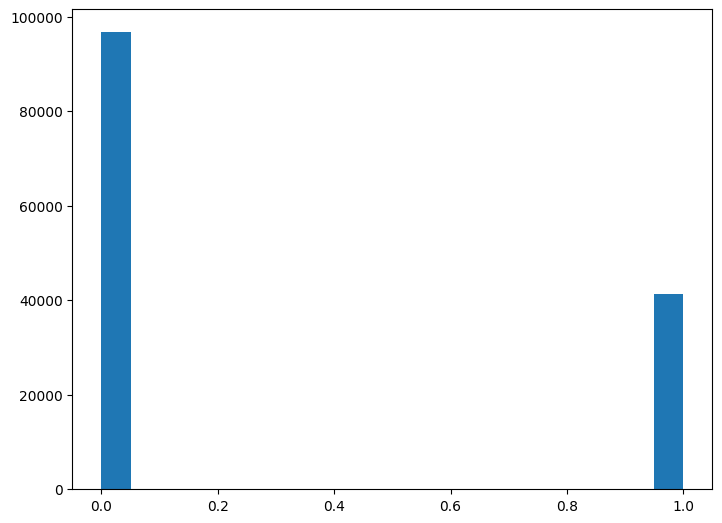

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(malData['legitimate'],20)
plt.show()

# Data Cleaning

In [ ]:
y=malData['legitimate']
malData=malData.drop(['legitimate'],axis=1)

In [ ]:
malData=malData.drop(['Name'],axis=1)
malData=malData.drop(['md5'],axis=1)
print(" The Name and md5 variables are removed successfully")

 The Name and md5 variables are removed successfully


In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# X_new = SelectKBest(chi2, k=2).fit_transform(malData, y)
# X_new.shape

# Spliting the dataset into test and train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(malData,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(110437, 54)

# Model Building </br> </br>
## 1- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)

randomModel=clf.fit(X_train, y_train)



## Random forest Evaluation on test data

In [ ]:
from sklearn.metrics import f1_score,accuracy_score,auc,confusion_matrix


In [ ]:
#  Accuracy on the train dataset

train_pred=randomModel.predict(X_train)

accuracy_score(y_train,train_pred)

0.9828318407780001

In [ ]:
# Accuracy on the test dataset

prediction=randomModel.predict(X_test)

accuracy_score(y_test,prediction)

0.9838102136906918

In [ ]:
f1_score(y_test, prediction)

0.9730933606212002

## Confusion matrix

## 2 - logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)

logModel=clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with a different solver
logModel = LogisticRegression(solver='saga')  # Try different solvers


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then, fit the Logistic Regression model with the scaled data
logModel.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with a higher max_iter value
logModel = LogisticRegression(max_iter=1000)  # Increase max_iter as needed


## Model Evaluation

In [ ]:
# Accuracy on the train dataset

train_log= logModel.predict(X_train)

accuracy_score(y_train,train_log)



0.7015221347917817

In [ ]:
# Accuracy on the test dataset

pred=logModel.predict(X_test)

accuracy_score(y_test,pred)


0.6972111553784861

In [ ]:
f1_score(y_test, pred)


0.0

## Confusion matrix

## 3- Neural Network

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense


In [ ]:
# Define model
model = Sequential()
model.add(Dense(16, input_dim=54, activation= "relu"))
model.add(Dense(8, activation= "relu"))
model.add(Dense(4, activation= "relu"))
model.add(Dense(1, activation='sigmoid'))
model.summary() #Print model Summary

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                880       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 5         
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model.compile(loss= "binary_crossentropy" , optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
# Fit Model
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 3s 727us/step - loss: 6907936.0000 - accuracy: 0.9472
Epoch 2/5
3452/3452 [==============================] - 2s 663us/step - loss: 6835772.0000 - accuracy: 0.9533
Epoch 3/5
3452/3452 [==============================] - 2s 675us/step - loss: 3920674.5000 - accuracy: 0.9470
Epoch 4/5
3452/3452 [==============================] - 2s 677us/step - loss: 4201450.5000 - accuracy: 0.9471
Epoch 5/5
3452/3452 [==============================] - 2s 675us/step - loss: 2288503.0000 - accuracy: 0.9462


## Model evaluation

In [ ]:
# Accuracy on the training dataset
trainPred=model.predict(X_train)

trainPred=[1 if y>= 0.5 else 0   for y in trainPred]

accuracy_score(y_train,trainPred)

3452/3452 [==============================] - 6s 2ms/step


0.7015221347917817

In [ ]:
# Accuracy on the test dataset
y_prediction=model.predict(X_test)

y_prediction=[1 if y>= 0.5 else 0   for y in y_prediction]

accuracy_score(y_test, y_prediction)

863/863 [==============================] - 1s 1ms/step


0.6971387178558494

In [ ]:
confusion_matrix(y_test,y_prediction)

array([[19248,     2],
       [ 8360,     0]])

In [ ]:
f1_score(y_test,y_prediction)

0.0